<a href="https://colab.research.google.com/github/marcelob2007/CienciaDeDados/blob/main/Aula_04_DesafioF_Marcelo_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Alinemm/DMIE-2020.1/master/DesafioA-cursos-prouni-pb-jpa.csv')

In [ ]:
df

In [ ]:
#valor média das instituições da PB
df.mensalidade.mean()

In [ ]:
#valor mediana das instituições da PB
df.mensalidade.median()

In [ ]:
#desvio padrao das instituições da PB
df.mensalidade.std()

In [ ]:
#moda das instituições da PB
df.mensalidade.mode()

---------

Desafio B

In [ ]:
df.columns

In [ ]:
#A
type(df)

In [ ]:
#B
df.shape

In [ ]:
#C
df.universidade_nome.nunique()

In [ ]:
#D
df.nome.nunique()

In [ ]:
#E
df.universidade_nome[(df.nome=='Ciência da Computação') | (df.nome=='Ciências da Computação')].unique()

In [ ]:
#F
df.mensalidade[(df.nome=='Ciência da Computação') | (df.nome=='Ciências da Computação')].mean()



---



Desafio C

In [ ]:
#Desafio C - Detecção de outliers
df.isna().mean()

In [ ]:
#Estratégia 1
print("média da mensalidade: ",df.mensalidade.mean())
print("mediana da mensalidade: ",df.mensalidade.median())

print("\nmédia da nota_integral_ampla: ",df.nota_integral_ampla.mean())
print("mediana da nota_integral_ampla: ",df.nota_integral_ampla.median())

print("\nmédia da nota_integral_cotas: ",df.nota_integral_cotas.mean())
print("mediana da nota_integral_cotas: ",df.nota_integral_cotas.median())

In [ ]:
#Estratégia 2
print("desvio padrão da mensalidade: ",df.mensalidade.std())
print("\ndesvio padrão da nota_integral_ampla: ",df.nota_integral_ampla.std())
print("\ndesvio padrão da nota_integral_cotas: ",df.nota_integral_cotas.std())

In [ ]:
#Estratégia 3
from scipy import stats
import numpy as np

df['zscore_mensalidade'] = np.abs(stats.zscore(df.mensalidade))
df['zscore_nota_integral_ampla'] = np.abs(stats.zscore(df.nota_integral_ampla))
df['zscore_nota_integral_cotas'] = np.abs(stats.zscore(df.nota_integral_cotas))

In [ ]:
df.zscore_mensalidade[(df.zscore_mensalidade> 3) | (df.zscore_mensalidade <-3)].count()

In [ ]:
df.zscore_nota_integral_ampla[(df.zscore_nota_integral_ampla> 3) | (df.zscore_nota_integral_ampla <-3)].count()

In [ ]:
df.zscore_nota_integral_cotas[(df.zscore_nota_integral_cotas> 3) | (df.zscore_nota_integral_cotas <-3)].count()

In [ ]:
#Estratégia 4 - Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.mensalidade)

In [ ]:
sns.boxplot(data=df.nota_integral_ampla)

In [ ]:
sns.boxplot(data=df.nota_integral_cotas)

Tratando os outliers

In [ ]:
#Estratégia 1
df_semOutliers1 = df[(df.zscore_mensalidade<3) & (df.zscore_mensalidade> -3)]

In [ ]:
#Estratégia 2
df_semOutliers2 =  df
df_semOutliers2.mensalidade = np.where((df_semOutliers2.zscore_mensalidade>3) | (df_semOutliers2.zscore_mensalidade<-3), 
                                       df_semOutliers2.mensalidade.mean(), 
                                       df_semOutliers2.mensalidade)


In [ ]:
#Estratégia 3
df_semOutliers3 = df
df_semOutliers3 = df_semOutliers3[df_semOutliers3.mensalidade.between(df.mensalidade.quantile(.25), df.mensalidade.quantile(.75))]
print(df_semOutliers3.shape)
print(max(df_semOutliers3.mensalidade))

In [ ]:
print(df.shape)
print(max(df.mensalidade))




---



Desafio F

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


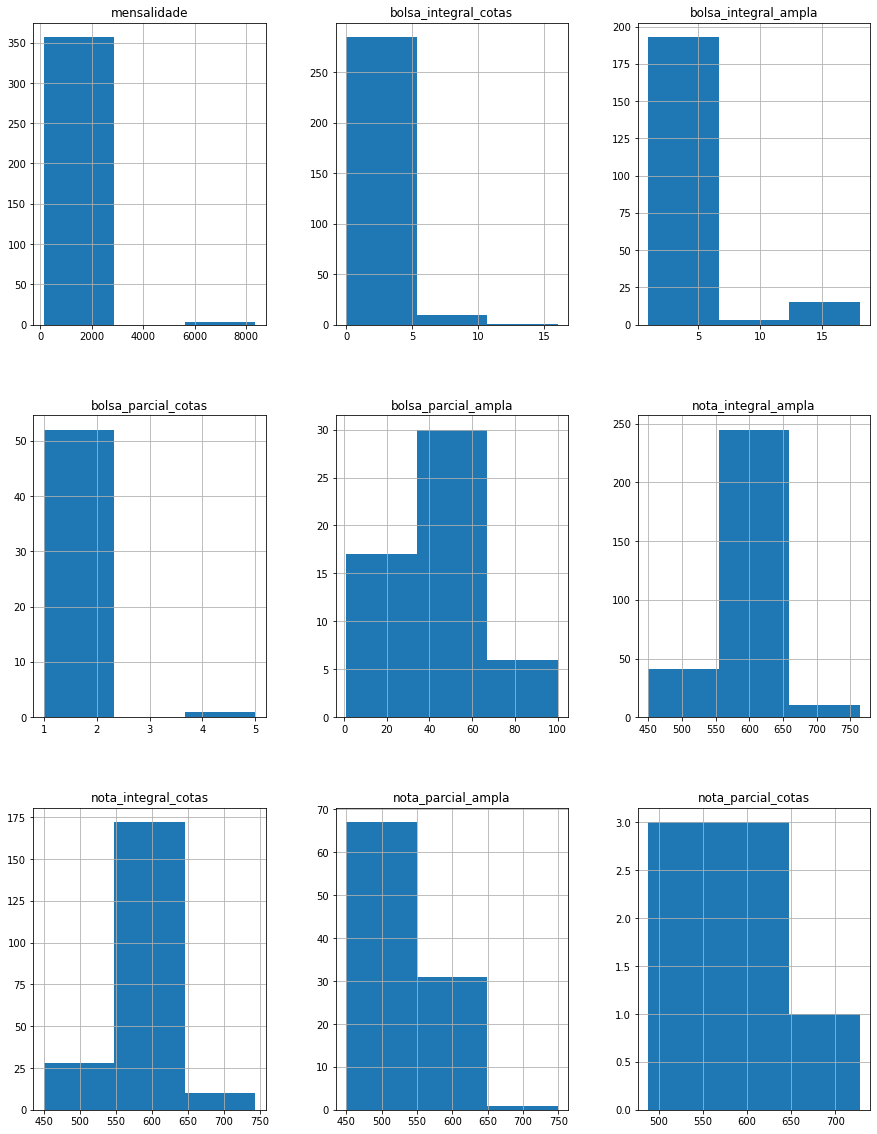

In [2]:
# Primeiro método - geração de histogramas
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (15,20))
ax = fig.gca()
hist = df.hist(bins=3, ax=ax)

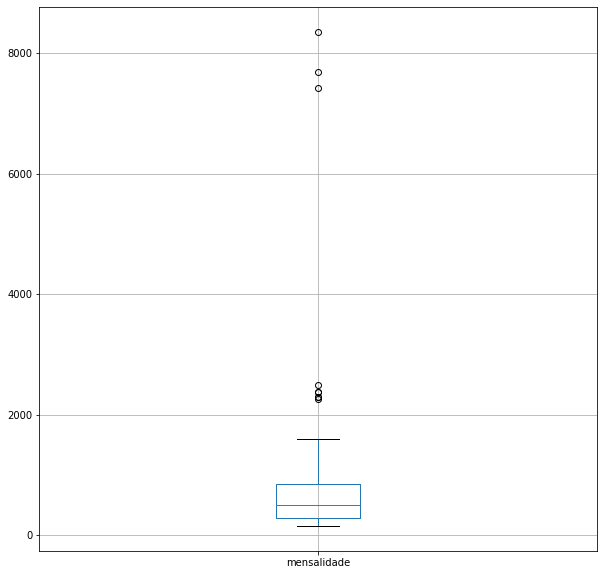

In [15]:
#2 método - boxplot

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

boxplot = df.boxplot(column=['mensalidade',
                            ],
                            ax=ax, )

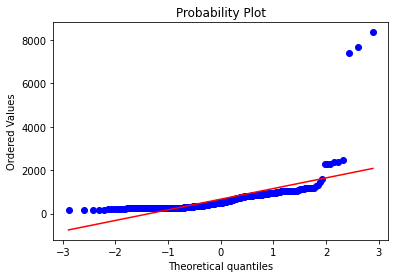

In [9]:
#3 método - QQplot

import pylab
import scipy.stats as stats

stats.probplot(df.mensalidade, dist="norm",plot=pylab)
pylab.show()

In [16]:
#4 método - KS

from scipy.stats import kstest

kstest(df.mensalidade, 'norm')


# é normal?

KstestResult(statistic=1.0, pvalue=0.0)

In [17]:
#5 método - método de lilliefors
from statsmodels.stats.diagnostic import lilliefors

lilliefors(df.mensalidade)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(0.2516123813493612, 4.7580946592433724e-64)

In [18]:
#6 método - Shapiro
from scipy.stats import shapiro

shapiro(df.mensalidade)

(0.42161989212036133, 2.403652317929352e-32)

In [19]:
#7 método - teste de Kurtosis e Skewness
import scipy.stats as stats

stats.normaltest(df.mensalidade)

NormaltestResult(statistic=514.980825526912, pvalue=1.4905089694701416e-112)